# EX2


## Data Analysis using simple plots

- Review the examples of basic visualization using Python libraries and Pandas.

## Advertising data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

A toy dataset for your exploratory data analysis:

./data/Advertising.csv

In [1]:
import pandas as pd

In [2]:
# read CSV file stored in the current directory and save the results
data = pd.read_csv('./data/Advertising.csv', skipinitialspace=True, index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9


What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [3]:
#display all data. You can uncomment the code in the next line

#display(data)

data.shape

(200, 4)

## Part 1 Tasks

Create cells to solve each of the following problems.

(1) For each field of the data, what is the mean of the data? What is the median? Are there any dataset has mode value?

(2) For each field of the data, give the five-number summary, minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

(3) For each field of the data, visulize a boxplot of the data and compare it to your answer in (b).

(4) For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.)

(5) For Sales, visualize the trend of the data over time using a graph.

(6) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), calculate the Pearson's correlation coefficient factor r.

(7) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph.

(8) Discuss what the differences are between the three: (a) boxplot, (b) histogram, and (c) scatter plot with respect to founding.

### 1. Mean, Median, Mode

In [4]:
data.mean()

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64

In [5]:
data.median()

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64

In [6]:
data.mode()

,TV,Radio,Newspaper,Sales
0,17.2,4.1,8.7,9.7
1,76.4,5.7,9.3,NaN
2,109.8,NaN,25.6,NaN
3,177.0,NaN,NaN,NaN
4,184.9,NaN,NaN,NaN
5,197.6,NaN,NaN,NaN
6,199.8,NaN,NaN,NaN
7,222.4,NaN,NaN,NaN
8,237.4,NaN,NaN,NaN
9,240.1,NaN,NaN,NaN


### 2. Summary

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### 3. Boxplot

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

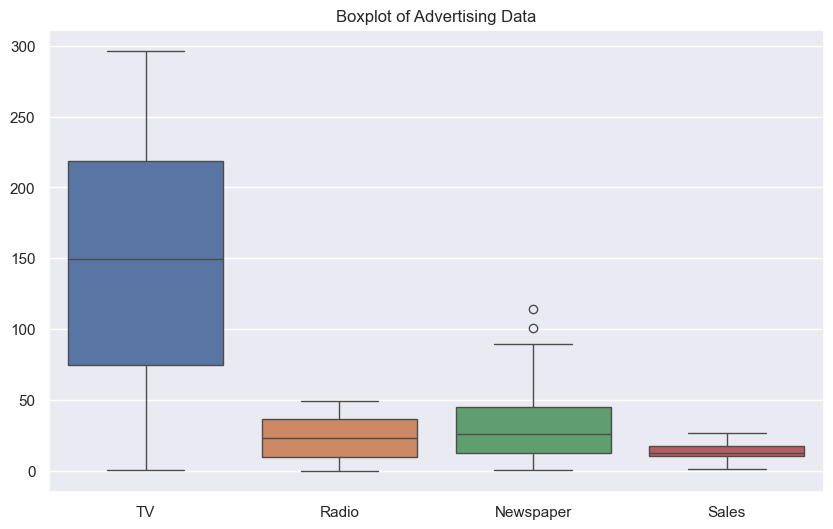

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot of Advertising Data')
plt.show()

### 4. Sales Histogram

Text(0, 0.5, 'Frequency')

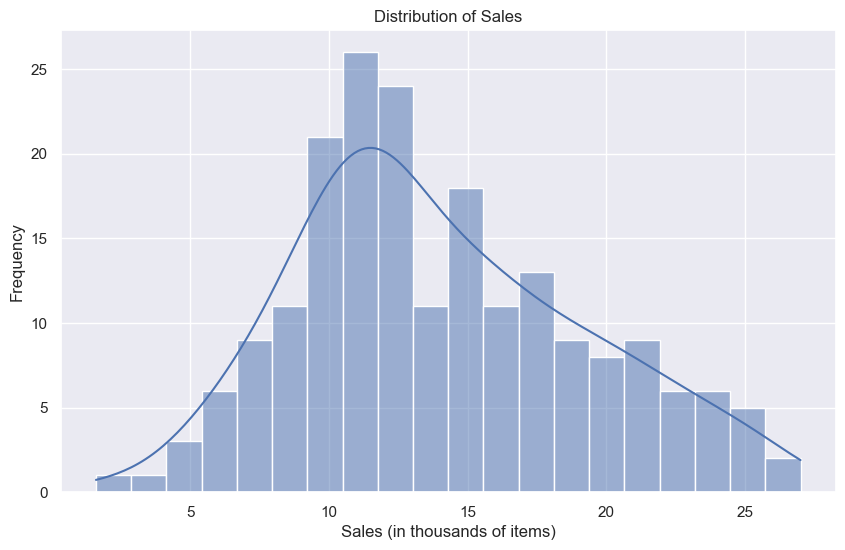

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], kde=True, bins=20)
plt.title('Distribution of Sales')
plt.xlabel('Sales (in thousands of items)')
plt.ylabel('Frequency')

Based on the histogram you've provided, the distribution of 'Sales' is *unimodal*. As seen from both the bars of the histogram and the smooth KDE curve, there is only one distinct and prominent peak. I have also tried other bin sizes, and the distribution is similar for other bin sizes.


### 5. Sales Trend

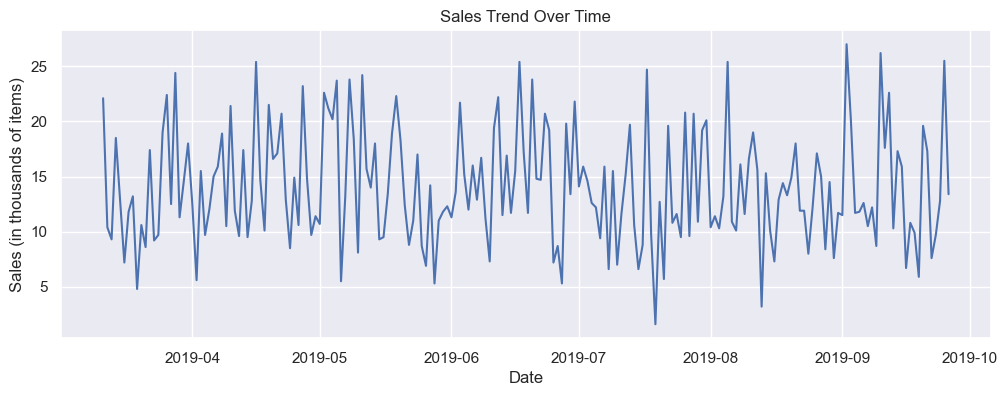

In [11]:
data.index = pd.to_datetime(data.index, format='%m/%d/%y')
plt.figure(figsize=(12, 4))
plt.plot(data.index, data['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales (in thousands of items)')
plt.title('Sales Trend Over Time')
plt.grid(True)
plt.show()

### 6. Pearson's Correlation Coefficient

In [12]:
corr_tv = data['TV'].corr(data['Sales'])
corr_radio = data['Radio'].corr(data['Sales'])
corr_newspaper = data['Newspaper'].corr(data['Sales'])

print(f"Pearson's correlation coefficient (r) for TV-Sales: {corr_tv:.4f}")
print(f"Pearson's correlation coefficient (r) for Radio-Sales: {corr_radio:.4f}")
print(f"Pearson's correlation coefficient (r) for Newspaper-Sales: {corr_newspaper:.4f}")

Pearson's correlation coefficient (r) for TV-Sales: 0.7822
Pearson's correlation coefficient (r) for Radio-Sales: 0.5762
Pearson's correlation coefficient (r) for Newspaper-Sales: 0.2283


### 7. Scatter Graph

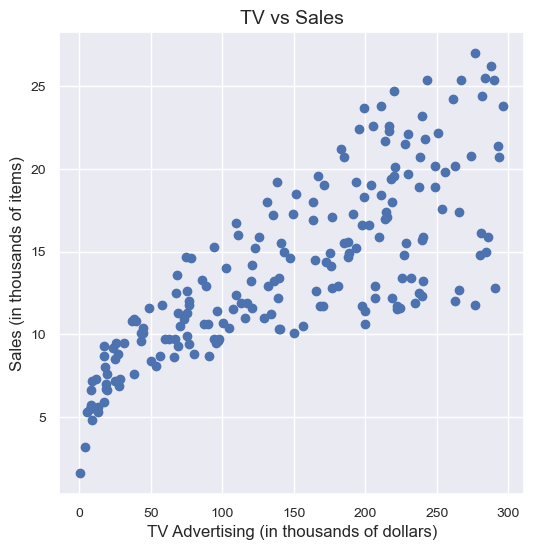

In [13]:
# Scatter plot for TV vs Sales
plt.figure(figsize=(6, 6)) # Adjust figure size for a single plot
plt.scatter(data['TV'], data['Sales'])
plt.title('TV vs Sales', fontsize=14)
plt.xlabel('TV Advertising (in thousands of dollars)', fontsize=12)
plt.ylabel('Sales (in thousands of items)', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.grid(True)
plt.show()

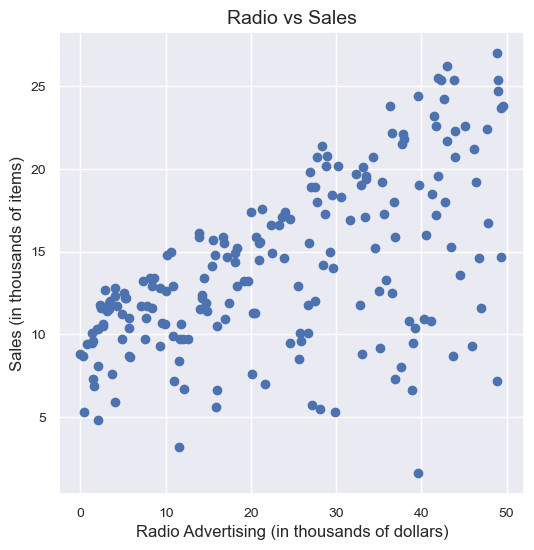

In [14]:
# Scatter plot for Radio vs Sales
plt.figure(figsize=(6, 6))
plt.scatter(data['Radio'], data['Sales'])
plt.title('Radio vs Sales', fontsize=14)
plt.xlabel('Radio Advertising (in thousands of dollars)', fontsize=12)
plt.ylabel('Sales (in thousands of items)', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.grid(True)
plt.show()

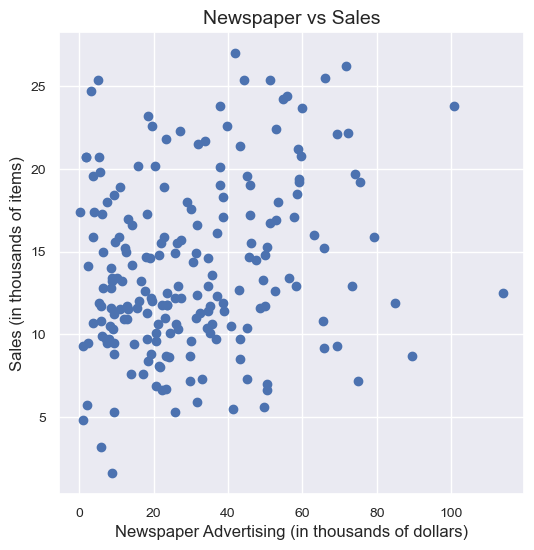

In [15]:
# Scatter plot for Newspaper vs Sales
plt.figure(figsize=(6, 6))
plt.scatter(data['Newspaper'], data['Sales'])
plt.title('Newspaper vs Sales', fontsize=14)
plt.xlabel('Newspaper Advertising (in thousands of dollars)', fontsize=12)
plt.ylabel('Sales (in thousands of items)', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.grid(True)
plt.show()

### 8. Differences Between Plots

Each plot offers a unique perspective on the advertising and sales data, revealing different aspects of their characteristics and relationships.

*   **Histogram: Distribution of Sales**
    *   Focuses on the distribution of a single variable (Sales).
    *   **Primary Finding:** The data is approximately a *unimodal* normal distribution, with sales figures centered around a peak of 10,000 to 15,000 items.

*   **Boxplot: Comparison of Spending Ranges**
    *   A box plot (or box and whisker plot) visually summarizes a dataset using the five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum, showing its distribution, center, spread, and potential outliers.
    *   **Primary Finding:** 
        *   TV advertising budgets are considerably larger and more variable than others.
        *   Radio and Newspaper spending is generally lower and Newspaper spending includes two outliers.

*   **Scatter Plots: Relationships and Correlation Between Variables**
    *   Visualizes the relationship and correlation between pairs of variables.
    *   **Primary Finding:**
        *   There is a *strong, positive correlation* between TV ad spending and sales.
        *   The relationship between Newspaper ad spending and sales is weak and scattered, suggesting a much less direct correlation.
So, it is clear that each plot can provide us different important information. Some reveals univariate characteristics, some visualizes the relationship between multiple variables.

## Part 2
It is good practice to write a summary of your findings from data anlaysis.

## Findings from the data analysis
1. Advertising spending on TV is significantly higher (higher mean) then on Radio and Newspaper. The TV spendings also has higher spread than the other two.
2. A particular valriable might have multiple modes. This is why pandas .mode() method shows all the possible modes. Although for this particular dataset's sales variable, there is only 1 mode. So, this is unimodal.
3. Newspaper spending has multiple (at least 2) outliers.
4. Sales has approximately unimodal normal distribution with a peak around 10,000 to 15,000 items as revealed by the histogram and the KDE curve. Changing the bin sizes for the histogram for sales shows more or less a similar distribution.
5. The sales trend over time shows no clear pattern.
6. The scatter plot and pearson's correlation coefficient shows similar trends. The correlation between sales with TV, Newspaper and Radio are all positive, but for TV spendings it is much higher. It is also seen in the scatter plots. For Newspaper ad spending, there is a much less correlation.

### Resources

#### Boxplot
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


- matplotlib.pyplot boxplot demo
https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html


#### matplotlib.pyplot
- scatter plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html


- histogram plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html


#### pandas DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


- describe()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


- corr()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


- hist()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


- plot.scatter()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html


- pivot()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html